In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [8]:
n = 64
x = np.linspace(0, 2, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

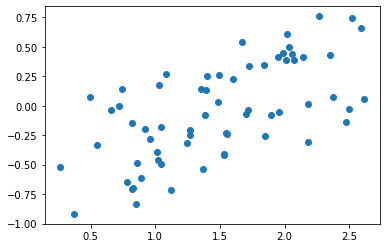

In [9]:
plt.scatter(x.T[0], y)

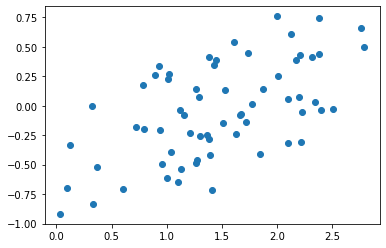

In [10]:
plt.scatter(x.T[1], y)

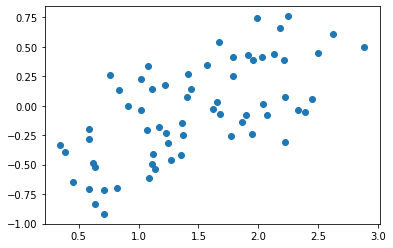

In [11]:
plt.scatter(x.T[2], y)

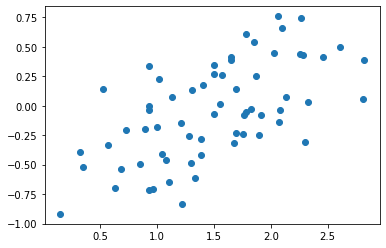

In [12]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [13]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [7]:
columns = ['Income', 'Limit']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 1.00000e+00]])

In [11]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
5      569
6      259
7      512
8      266
9      491
10     589
11     138
12     394
13     511
14     269
15     200
16     286
17     339
18     448
19     479
20     235
21     458
22     213
23     398
24     156
25     326
26     289
27     333
28     949
29     411
      ... 
370    466
371    173
372    293
373    383
374    368
375    413
376    515
377    142
378    366
379    214
380    538
381    574
382    409
383    282
384    180
385    398
386    287
387    126
388    482
389    503
390    747
391    472
392    196
393    138
394    410
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can. Do you 